<a href="https://colab.research.google.com/github/anasysidani/DDDM-Streamlit/blob/main/CapstoneAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
data= pd.read_csv("OTT_Data.csv")

In [78]:
data.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Sports Event,Famous Actor present in episode
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             80 non-null     object
 1   Views_show                       80 non-null     int64 
 2   Visitors                         80 non-null     int64 
 3   Views_platform                   80 non-null     int64 
 4   Ad_impression                    80 non-null     int64 
 5   Sports Event                     80 non-null     int64 
 6   Famous Actor present in episode  80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [80]:
data.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Sports Event,Famous Actor present in episode
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [81]:
#add a new binary column which shows if the day was a weekend or not (this migt affect viewership)
data['Date'] = pd.to_datetime(data['Date'])

data['is_weekend'] = (data['Date'].dt.dayofweek >= 5).astype(int)



In [82]:
import holidays

In [83]:
#add a new binary column which shows if the day was a holiday
us_holidays = holidays.US()

# Create binary column for holiday/normal day
data['is_holiday'] = data['Date'].apply(lambda x: int(x in us_holidays))


In [84]:
data['is_holiday'].describe()
#the output shows that there were no holidays so I will not include this column in the model

count    80.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: is_holiday, dtype: float64

In [85]:
#I will add another column with the lags of the ad impressions since users who watch an ad for the show one day before 
#might make the time to watch the show the next day
data['lag_ad'] = data['Ad_impression'].shift(1)

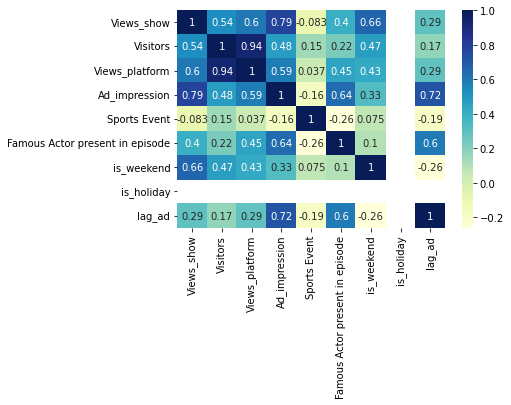

In [86]:
corr = data.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

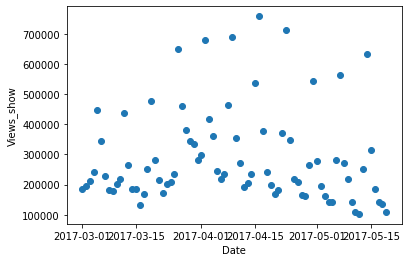

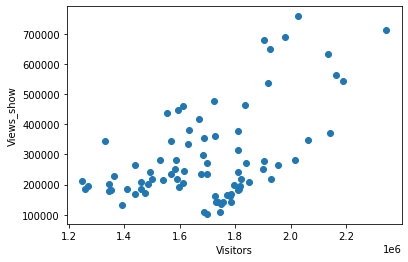

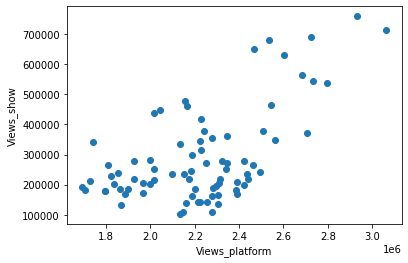

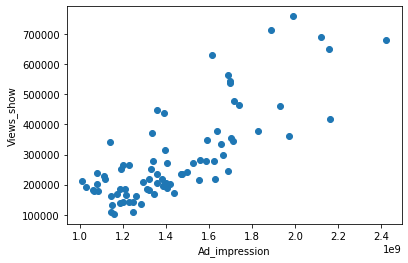

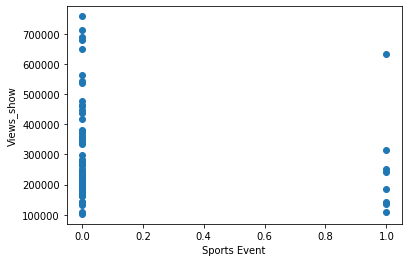

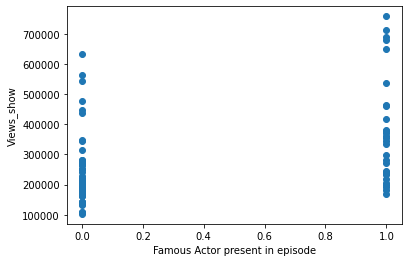

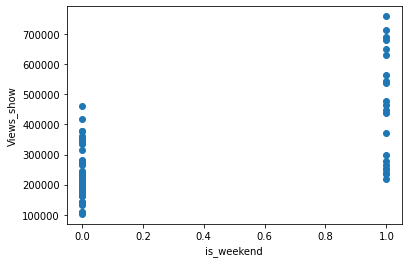

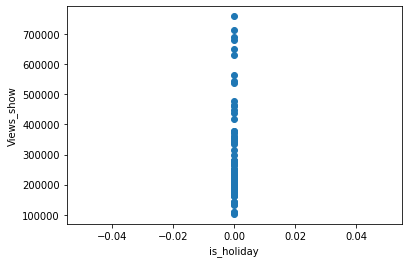

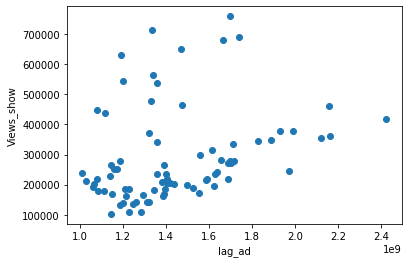

In [87]:
target_variable = 'Views_show'

for col in data.columns:
    
    if col == target_variable:
        continue
    
    # Create a scatter plot of the column with the target variable column
    plt.scatter(data[col], data[target_variable])
    plt.xlabel(col)
    plt.ylabel(target_variable)
    plt.show()

###based on the above EDA we will take the following columns:


*  Visitors
*  Views_platforms
*  Ad_impressions
*  Famous Actors present in episode
*  is_weekend
*   lag_ad

**note that some have low correlation but there aren't many variables so it wont take a toll on the efficiency of the model to use all of them**







In [88]:
#dropping the missing row due to creating the lag column (one day lag so one day will be missing)
data = data.dropna()

In [89]:
print(data.columns)


Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Sports Event', 'Famous Actor present in episode', 'is_weekend',
       'is_holiday', 'lag_ad'],
      dtype='object')


In [90]:
X = data[['Visitors', 'Views_platform','Ad_impression','Famous Actor present in episode','is_weekend','lag_ad']]
y = data["Views_show"]

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))

R-squared: 0.7400464918386507


In [92]:
#adding lag columns for other




data['lag_Visitors'] = data['Visitors'].shift(1)
data['lag_Views_platform'] = data['Views_platform'].shift(1)
data['lag_Ad_impression'] = data['Ad_impression'].shift(1)
data['lag_Famous Actor present in episode'] = data['Famous Actor present in episode'].shift(1)

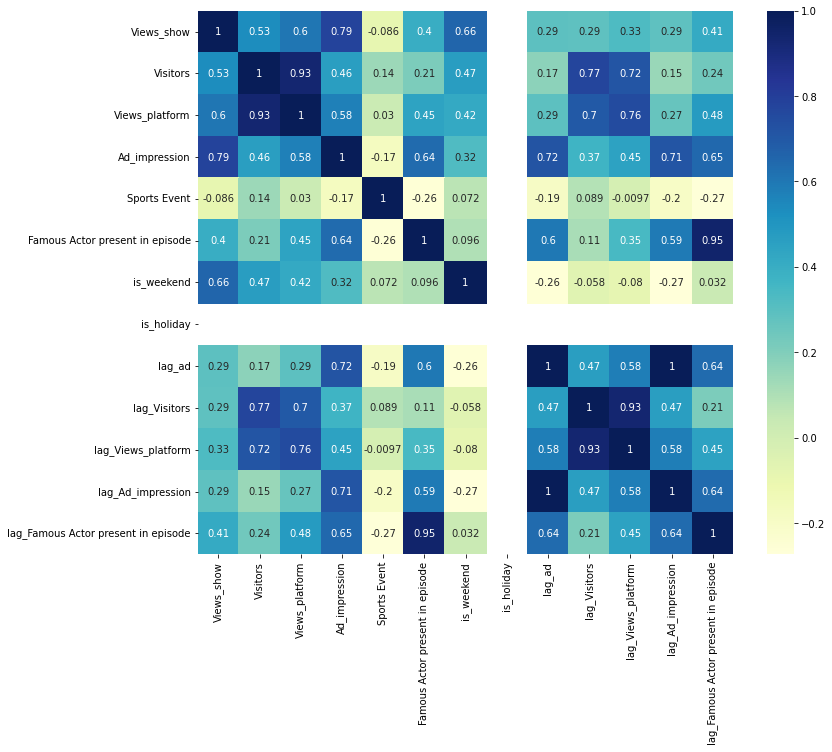

In [93]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=True,ax=ax)
plt.show()

###lags didn't show an enhanced correlation so no need for them

In [94]:
#deleting lag columns
data = data.drop(['lag_Visitors','lag_Views_platform','lag_Ad_impression','lag_Famous Actor present in episode'], axis=1)

In [95]:
from sklearn.model_selection import cross_val_score, KFold


In [96]:
num_folds = 5
model2 = LinearRegression()
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scores = cross_val_score(model2, X, y, cv=cv, scoring='r2')
mean_score = scores.mean()
std_score = scores.std()


In [97]:
print(f'Mean R^2 score with {num_folds}-fold cross-validation: {mean_score:.3f} +/- {std_score:.3f}')


Mean R^2 score with 5-fold cross-validation: 0.768 +/- 0.085


###no obvious difference between the 2 so im going to pick the first. Note that if there was more columns I would have done feature selection (like RFECV) and more models usinf more complex algorithms. In a large dataset I would have checked for outliers as well.

In [100]:
! pwd

/content


In [101]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

[NbConvertApp] WARNING | pattern '/PATH/TO/YOUR/NOTEBOOKFILE.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

CalledProcessError: ignored